Can variables in our dataset predict if a parcel is owned by a corporate landlord or not? 

First, the final parcels csv is imported into a dataframe.

In [99]:
import pandas as pd
ellisjoindf2 = pd.read_csv('/Users/antaramurshed/Desktop/parcels_finaldf.csv')
ellisjoindf2


/Users/antaramurshed/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ain,fid,center_lon,yearbuilt5,yearbuilt4,yearbuilt1,usetype,yearbuilt2,apn,...,units_withdrawn,replacement_unit,yearbuilt,units,sqftmain,center_lat_ellis,center_lon_ellis,geometry_ellis,application_date,ellis_status
0,0,5204008002,25303,-118.215784,NaN,NaN,1887.0,Residential,2003.0,5204-008-002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,5204008023,25423,-118.216276,NaN,NaN,1902.0,Residential,1923.0,5204-008-023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,5204009003,25424,-118.215121,NaN,NaN,1908.0,Residential,NaN,5204-009-003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,5204008013,25459,-118.216663,NaN,NaN,1888.0,Residential,1979.0,5204-008-013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,5204010015,25498,-118.214820,NaN,NaN,1906.0,Residential,NaN,5204-010-015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100135,100135,7469010010,2399857,-118.296326,NaN,NaN,1948.0,Residential,NaN,7469-010-010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100136,100136,5542021027,2399860,-118.286945,NaN,NaN,1963.0,Residential,NaN,5542-021-027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100137,100137,5312008026,2400485,-118.184943,NaN,NaN,1936.0,Commercial,1904.0,5312-008-026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100138,100138,5302027011,2400783,-118.188176,NaN,NaN,1948.0,Residential,NaN,5302-027-011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Here, we're splitting the data into a training and testing sample

In [100]:
from sklearn.model_selection import train_test_split

In [118]:
xvars = [ 'ain', 'sqft_total','yearbuilt_avg', 'built_to_land', 'estimated_density_per_acre',
                       'median_income_2019','median_rent_2019','median_value_2019','part_black_2019',
                       'part_latx_2019', 'part_white_2019', 'part_female_head_2019', 'part_hh_kids_2019',
                       'part_rented_2019', 'part_unemployed_2019', 'part_poverty_2019', 'part_vacant_2019',
                       'part_college_2019','change_rent_14_19', 'change_value_14_19', 'change_part_rented_14_19',
                       'change_part_white_14_19', 'change_part_black_14_19', 'change_part_latx_14_19',
                       'change_part_college_14_19', 'change_part_unemployed_14_19', 'change_part_hh_kids_14_19',
                       'change_part_female_head_14_19', 'change_part_poverty_14_19', 'change_part_vacant_14_19', 
                       'center_lon','center_lat']
yvar = 'landlord_iscorp'
df_to_fit = ellisjoindf2[xvars+[yvar]].dropna()
#not working might have to delete column repetitions

In [148]:
X_train, X_test, y_train, y_test = train_test_split(df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, random_state = 1)
print(len(X_train), len(y_train) )
print(len(X_test), len(y_test) )

75105 75105
25035 25035


In [149]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [150]:
y_pred = rf.predict(X_test)

In [151]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [165]:
print('Predicted fraction True: {:.4f}. Actual fraction True: {:.4f}'.format(y_pred.mean(), y_test.mean()))

Predicted fraction True: 0.1170. Actual fraction True: 0.1987


[[18897  1164]
 [ 3209  1765]]


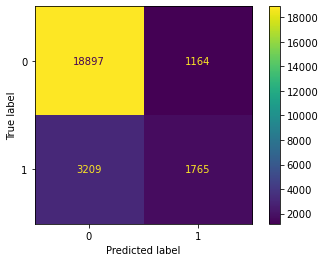

In [153]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

print(confusion_matrix(y_test, y_pred)) #actual compared to predicted
plot_confusion_matrix(rf, X_test, y_test)


In [155]:
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Accuracy score: 0.8253
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     20061
           1       0.60      0.35      0.45      4974

    accuracy                           0.83     25035
   macro avg       0.73      0.65      0.67     25035
weighted avg       0.80      0.83      0.81     25035



In [ ]:
The Confusion matrix has a 

In [156]:
rf.predict_proba(X_test)
#testing underlying probability of being a corporate landlord or not ,first is false and second is true probability 

array([[0.95, 0.05],
       [0.96, 0.04],
       [0.49, 0.51],
       ...,
       [0.97, 0.03],
       [0.51, 0.49],
       [0.86, 0.14]])

In [157]:
predictions = pd.DataFrame(rf.predict_proba(X_test), columns = ['pred_notCorpLandlord', 'pred_CorpLandlord'])
predictions.head()


,pred_notCorpLandlord,pred_CorpLandlord
0,0.95,0.05
1,0.96,0.04
2,0.49,0.51
3,0.67,0.33
4,0.91,0.09


In [158]:
predictions = predictions.join(X_test.reset_index())
predictions

,pred_notCorpLandlord,pred_CorpLandlord,index,ain,sqft_total,yearbuilt_avg,built_to_land,estimated_density_per_acre,median_income_2019,median_rent_2019,...,change_part_black_14_19,change_part_latx_14_19,change_part_college_14_19,change_part_unemployed_14_19,change_part_hh_kids_14_19,change_part_female_head_14_19,change_part_poverty_14_19,change_part_vacant_14_19,center_lon,center_lat
0,0.95,0.05,24220,5054026014,2548,1914,0.377483,19.360070,45288.0,1103.0,...,2.675771,-11.050812,-5.978703,2.246481,-8.160641,3.966280,-18.875122,-2.065855,-118.293407,34.033927
1,0.96,0.04,60735,2335026018,3122,1944,0.417875,23.321749,43816.0,1233.0,...,1.869287,-5.437690,-6.157041,-8.069036,-3.648057,9.631308,-10.543287,4.614900,-118.385593,34.186046
2,0.49,0.51,83620,5081007014,19010,1951,0.586752,26.889963,43167.0,1187.0,...,0.458477,-10.306404,-5.169103,-5.736298,-2.425975,6.001569,-7.625854,0.572402,-118.324117,34.049173
3,0.67,0.33,84270,4125023927,3317,1954,0.445188,29.231788,60179.0,1758.0,...,-1.628394,-4.901187,3.086209,1.086032,-17.986301,11.330427,9.661813,1.016200,-118.384056,33.948551
4,0.91,0.09,64041,5422007024,1260,1948,0.250274,17.304649,99660.0,1698.0,...,-3.131692,-5.157035,-7.127326,-2.741789,-4.912707,11.044000,-15.919165,-5.215022,-118.259467,34.095984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25030,0.95,0.05,52475,5510027039,4860,1927,0.777632,27.879559,96579.0,1776.0,...,5.781418,2.528656,-3.052830,-2.596361,1.415391,14.483611,1.291046,11.659079,-118.363957,34.064070
25031,0.98,0.02,62713,5590024001,2485,1921,0.365746,12.822445,81591.0,1731.0,...,-1.012941,-9.418278,-1.671851,-11.320994,4.067492,17.634910,-9.201878,10.259590,-118.285404,34.102436
25032,0.97,0.03,46147,5085030019,3023,1942,0.491863,21.262525,67414.0,1533.0,...,-18.359932,11.193469,3.680777,-9.080681,-10.770511,5.660120,-1.940660,-3.721598,-118.357303,34.051117
25033,0.51,0.49,5112,2210020021,15806,1958,0.738693,40.715518,30625.0,1078.0,...,0.060411,-1.738663,-3.949163,-13.675060,-21.756366,0.794464,-19.922822,-5.728981,-118.454297,34.215652


In [159]:
import geopandas as gpd
predictions = gpd.GeoDataFrame(predictions, geometry = gpd.points_from_xy(predictions.center_lon, predictions.center_lat, crs='EPSG:4326')

SyntaxError: unexpected EOF while parsing (<ipython-input-159-f37b95b2a7a1>, line 2)

AttributeError: 'DataFrame' object has no attribute 'to_crs'

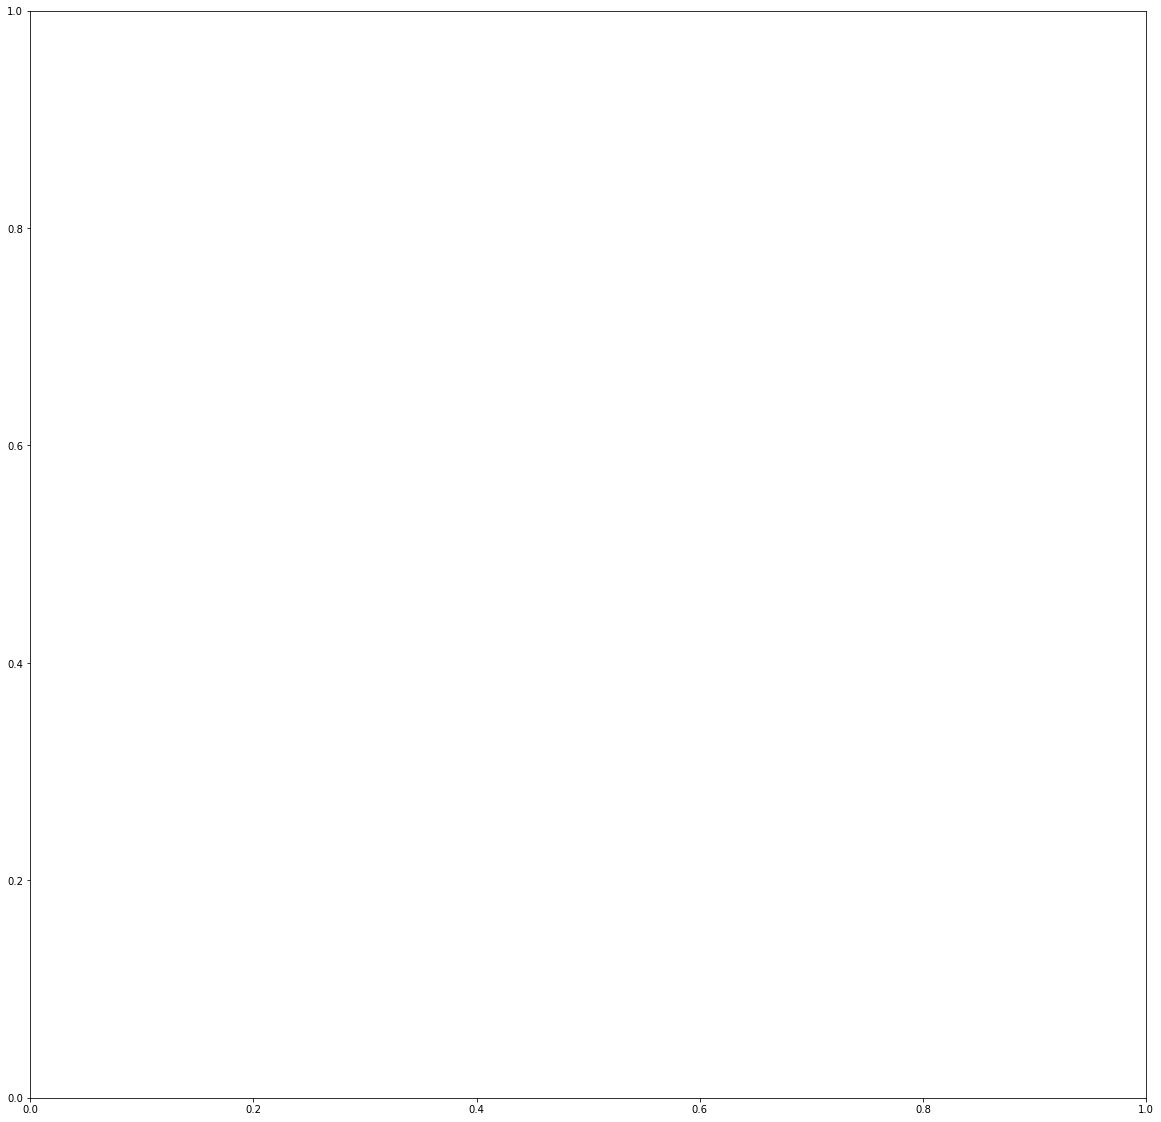

In [146]:
import contextily as ctx
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
predictions.to_crs('EPSG:3857').plot('pred_CorpLandlord', markersize=0.001, ax=ax)
ctx.add_basemap(ax=ax)
ax.set_xticks([])
ax.set_yticks([])

Text(0, 0.5, 'Mean decrease in impurity')

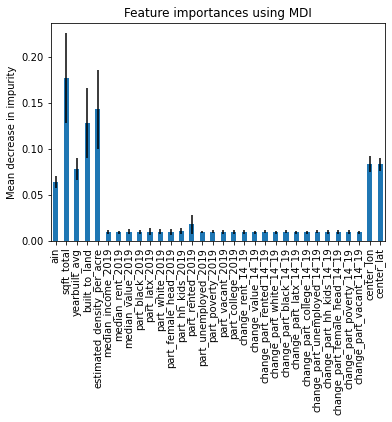

In [160]:
import numpy as np
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
ig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

Text(0, 0.5, 'Mean decrease in impurity')

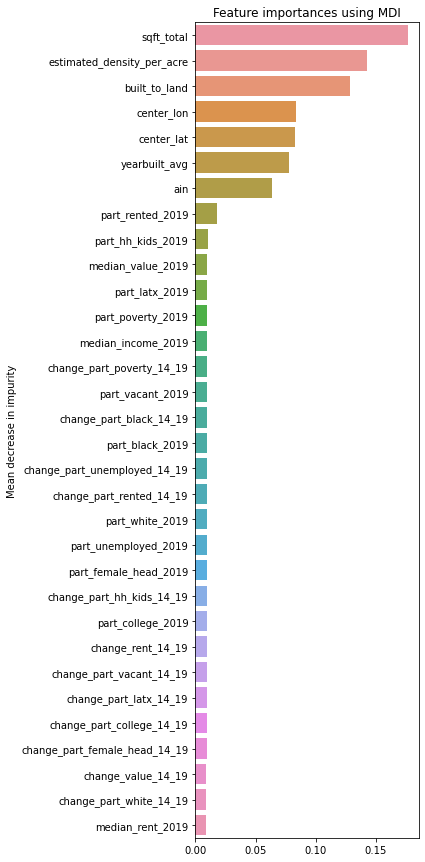

In [161]:
import seaborn as sns
forest_importances.sort_values(inplace=True, ascending=False)
ig, ax = plt.subplots(figsize=(4,15))
sns.barplot(x=forest_importances.values, y=forest_importances.index, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

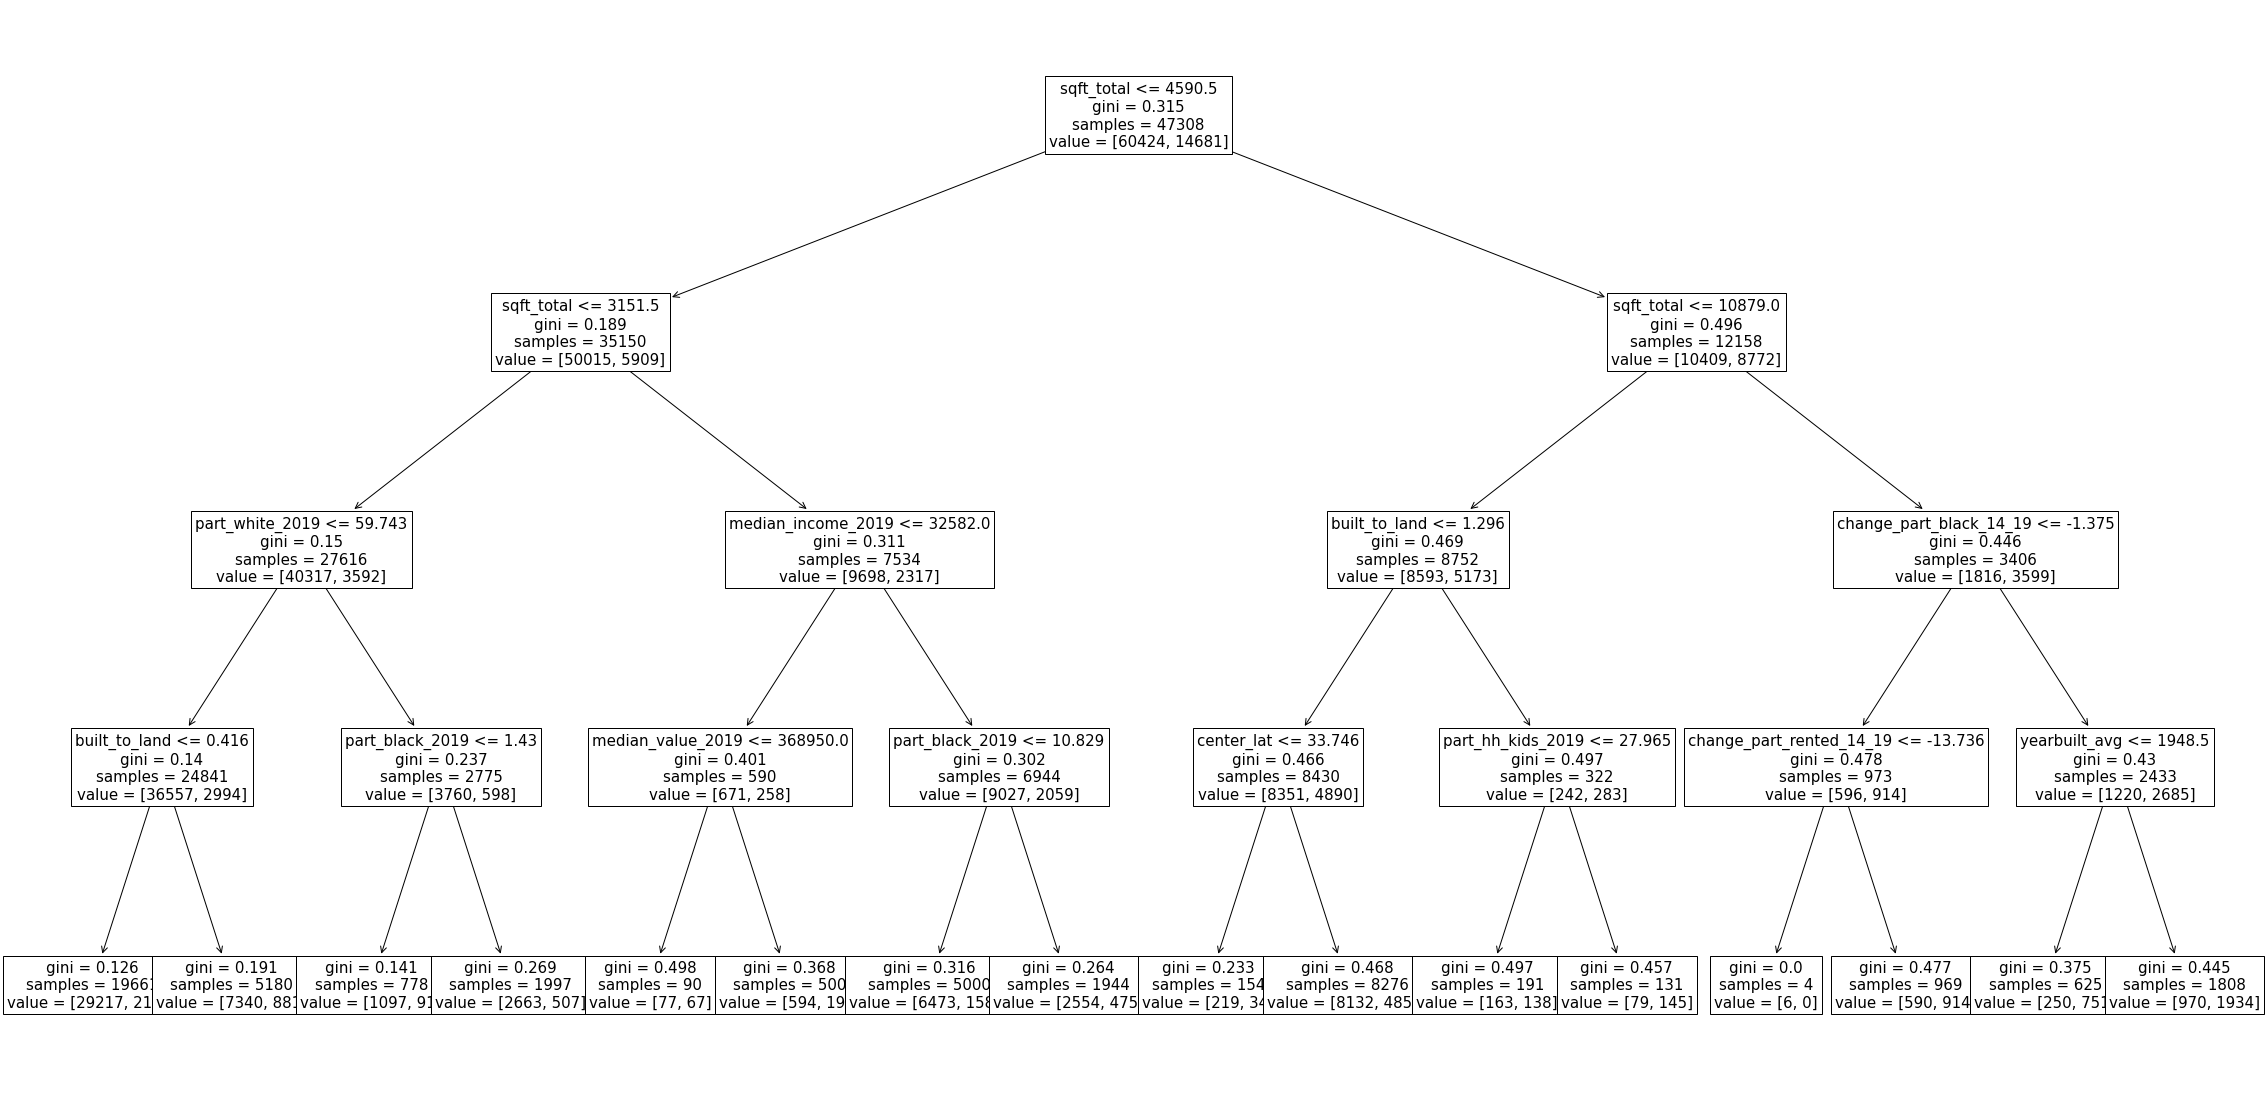

In [163]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1, n_jobs=-1, max_depth=4) 
rf.fit(X_train, y_train)
e = rf.estimators_[0]
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,20))  
_ = tree.plot_tree(e, feature_names = X_train.columns, fontsize=15, ax = ax)